# Quelques méthodes de classification
<h2>Introduction</h2>
La classification automatique a pour but d'obtenir une représentation simplifiée des données initiales. Elle consiste à organiser un ensemble de données en classes homogènes ou classes naturelles. 

Une définition formelle de la classification, qui puisse servir de base à un processus automatisé, amène à se poser les questions suivantes :
- Comment les objets à classer sont-ils définis ?
- Comment définir la notion de ressemblance entre objets ?
- Qu'est-ce qu'une classe ?
- Comment sont structurées les classes ?
- Comment juger une classification par rapport à une autre ?

Pour effectuer cette classification, deux démarches sont généralement utilisées :
- on regroupe en classes les objets qui partagent certaines caractéristiques.
- on regroupe en classes les objets qui possèdent des caractéristiques proches. C'est cette approche qui est étudiée ici

## Structures de classification
### Partition
```{index} Partition
```

````{prf:definition} Partition
$\Omega$ étant un ensemble fini, un ensemble $P =(P_1 ,P_2 ,\cdots  P_g )$ de parties non vides de   $\Omega$ est une partition si :
- $(\forall k\neq l) P_k \cap P_l=\emptyset$
- $\displaystyle\cup_{i=1}^gP_i=\Omega$
````
Dans un ensemble  $\Omega$ partitionné en $g$ classes, chaque élément de l'ensemble appartient à une classe et une seule. Une manière pratique de décrire cette partition $P$ consiste à lui associer la matrice de classification ${\bf C}=(c_{ij}), i\in [\![1,n]\!], j\in [\![1,g]\!]$, avec $c_{ij}=1$ si l'individu $i$ appartient à $P_j$, et $c_{ij}=0$ sinon. Dans le cas où l'on accepte qu'un individu appartienne à plusieurs classes (avec des degrés d'appartenance), on autorise $c_{ij}$ à couvrir l'intervalle [0,1] et on parle alors de classification floue.
### Hiérarchie indicée
```{index} Hiérarchie
```

````{prf:definition} Hiérarchie
$\Omega$ étant un ensemble fini, un ensemble $H$ de parties non vides de $\Omega$ est une hiérarchie sur $\Omega$ si :
- $\Omega \in H$
- $(\forall x\in \Omega) \{x\}\in H$
- $(\forall h,h'\in H) h\cap h'=\emptyset$ ou $h\subset h'$ ou $h'\subset h$
````

Une hiérarchie est souvent représentée par l'intermédiaire d'un indice, fonction $i$ de $H$ dans $\mathbb{R}^+$, strictement croissante vis à vis de l'inclusion et de noyau l'ensemble des singletons de $\Omega$.

### Partition et hiérarchie
Si $P =(P_1 \cdots,P_g)$ est une partition de $\Omega$, l'ensemble $H$ formé des classes $P_k$ de $P$, des singletons de   $\Omega$ et de l'ensemble  $\Omega$ lui-même forme une hiérarchie. Remarquons qu'inversement, il est possible d'associer à chaque niveau d'une hiérarchie indicée une partition. Une hiérarchie indicée correspond donc à un ensemble de partitions emboîtées.

## Objectifs de la classification
### Difficultés de caractériser les objectifs
L'objectif de la classification automatique est l'organisation en classes homogènes des éléments d'un ensemble  $\Omega$. Pour définir cette notion de classes homogènes, on utilise le plus souvent une mesure de similarité (ou de dissimilarité) sur  $\Omega$. Par exemple, on peut imposer à un couple quelconque d'individus d'une même classe d'être plus "proches" que n'importe quel couple formé par un individu de la classe et un individu d'une autre classe. En pratique, cet objectif est inutilisable, et plusieurs démarches sont alors utilisées pour remplacer cet objectif trop difficile à atteindre.

### Démarche numérique
#### Partition
On remplace cette condition trop exigeante par une fonction numérique (critère) qui mesure la qualité d'homogénéité d'une partition. Le problème peut paraître alors très simple. En effet, par exemple, dans le cas de la recherche d'une partition, il suffit de chercher parmi l'ensemble fini de toutes les partitions celle qui optimise le critère numérique. Malheureusement, le nombre de ces partitions étant très grand, leur énumération est impossible dans un temps raisonnable. 
Le nombre de partitions en $g$ classes d'un ensemble à $n$ éléments, que l'on note $S_n^g$ est le nombre de Stirling de deuxième espèce. En posant $S_0^0=1$ et pour tout $n>0$, $S_n^0=S_0^n=0$, il peut être calculé par récurrence grâce à la relation $S_n^g=S_{n-1}^{g-1}+gS_{n-1}^g$. On peut montrer que 

$$S_n^g = \frac{1}{g!}\displaystyle\sum_{i=1}^g (-1)^{g-i}\begin{pmatrix}g\\ i \end{pmatrix}i^n$$

et donc $S_n^g\sim \frac{g^n}{g!}$ lorsque $n\rightarrow\infty$. En pratique, sur un ordinateur calculant $10^6$ partitions par seconde, il faut 126 000 ans pour calculer l'ensemble des partitions d'un ensemble à $n=25$ éléments.



On utilise alors des heuristiques qui donnent, non pas la meilleure solution, mais une "bonne solution", proche de la solution optimale. On parle alors d'optimisation locale. Lorsqu'il existe une structure d'ordre sur l'ensemble  $\Omega$ et que celle-ci doit être respectée par la partition, il existe un algorithme de programmation dynamique (algorithme de Fisher), qui fournit la solution optimale.

#### Hiérarchie
Dans le cas d'une hiérarchie, on cherche à obtenir des classes d'autant plus homogènes qu'elles sont situées dans le bas de la hiérarchie. La définition d'un critère est moins facile. Nous verrons qu'il est possible de le faire en utilisant la
notion d'ultramétrique (ultramétrique optimale).

### Démarche algorithmique
Il s'agit cette fois de définir directement un algorithme qui construit des classes homogènes en tenant compte de la mesure de similarité. Il est relativement facile de proposer de tels algorithmes, le problème est de pouvoir vérifier que les résultats fournis sont intéressants et répondent au problème posé. En réalité, cette démarche rejoint assez souvent la précédente. 

### Mesure de dissimilarité et distance
Les algorithmes de classification dépendent d'une métrique qui définit implicitement la forme des classes qui seront calculées. Si la distance euclidienne suppose une isotropie dans les axes (et donc une représentation sphérique des classes), d'autres distances ou indices de dissimilarité peuvent être utilisés.

#### Indice de dissimilarité
On se place dans $\mathbb R^d$, et on considère $n$ individus à classer ${\bf x_1}\ldots {\bf x_n}$.
````{prf:definition} Dissimilarité - ultramétrique
Une mesure de dissimilarité $\delta$ est une fonction de 

$
 \delta: \begin{array}{ccc}
\mathbb{R}^d\times\mathbb{R}^d &\rightarrow &\mathbb{R}^+\\
(\mathbf x_i,\mathbf x_j)&\mapsto & \delta_{ij} = \delta(\mathbf x_i,\mathbf x_j)
\end{array}
$

vérifiant : 
- $(\forall i,j\in[\![1, n]\!])\ \delta_{ij}=\delta_{ji}$
- $(\forall i\in[\![1, n]\!])\ \delta_{ii}= 0$

Si l'inégalité triangulaire $\delta_{ij}\leq \delta_{ik}+\delta_{kj}$ est de plus vérifiée pour tout $i,j,k$, alors $\delta$ est une distance. 

Si enfin l'inégalité ultramétrique  $\delta_{ij}\leq max(\delta_{ik}+\delta_{jk})$ est  vérifiée pour tout $i,j,k$, $\delta$ est une ultramétrique.
````
A partir des mesures de dissimilarité, on déduit des mesures de similarité $s_{ij}$ le passage de l'une à l'autre se faisant par exemple par $\delta_{ij} = s_{max}-s_{ij}$.

#### Cas de variables qualitatives
On suppose que les $d$ composantes des ${\bf x_i}$ sont qualitatives, et on se limite ici au cas de variables bimodales. 
Étant donnés ${\bf x_i}=\begin{pmatrix} x_i^1\ldots x_i^d\end{pmatrix}$ et ${\bf x_j}$, on note :

- $a_{ij}$ le nombre de co-occurences entre les individus $i$ et $j$
- $b_{ij}$ le nombre de co-absences entre les individus $i$ et $j$
- $c_{ij}$ le nombre d'attributs présents chez $i$ et absents chez $j$
- $d_{ij}$ le nombre d'attributs absents chez $i$ et présents chez $j$


les mesures suivantes sont des exemples de dissimilarité :

- $\delta_{ij} = \sqrt{b_{ij}+c_{ij}}$ [distance "euclidienne" binaire]
- $\delta_{ij} = \frac{(b_{ij}-c_{ij})^2}{(a_{ij}+b_{ij}+c_{ij}+d_{ij})^2}$ [différence binaire de taille]
- $\delta_{ij} = \frac{(b_{ij}c_{ij})}{(a_{ij}+b_{ij}+c_{ij}+d_{ij})^2}$ [différence binaire de motif]
- $\delta_{ij} = \frac{(a_{ij}+b_{ij}+c_{ij}+d_{ij})(b_{ij}+c_{ij})-(b_{ij}-c_{ij})^2}{(a_{ij}+b_{ij}+c_{ij}+d_{ij})^2}$ [différence binaire de forme]
- $\delta_{ij} = \frac{(b_{ij}+c_{ij})}{4(a_{ij}+b_{ij}+c_{ij}+d_{ij})}$ [dissimilarité binaire de variance]
- $\delta_{ij} = \frac{(b_{ij}+c_{ij})}{2a_{ij}+b_{ij}+c_{ij}}$ [dissimilarité binaire de Lance et Williams]


#### Cas de variables quantitatives
Dans le cas de variables quantitatives, les normes  $L_p$ : 

$\|{\bf x_i}\|_p=\left (\displaystyle\sum_{j=1}^d|x_i^j|^p\right ) ^\frac{1}{p}$

sont classiquement utilisées, et par exemple 

- $p=1$ : $\|{\bf x_i}-{\bf x_j}\|_1=\displaystyle\sum_{k=1}^d|x_i^k-x_j^k|$ est la norme $L_1$ (ou city block).
- $p=2$ : $\|{\bf x_i}-{\bf x_j}\|_2=\sqrt{\displaystyle\sum_{k=1}^d(x_i^k-x_j^k)^2}$ est la norme $L_2$ (ou norme euclidienne).
- "$p=\infty$" : $\|{\bf x_i}-{\bf x_j}\|_\infty = \displaystyle\max_{1\leq k\leq d}\{|x_i^k-x_j^k|\}$ est la norme du max (ou norme de Tchebychev)

Si les variables ne sont pas normalisées, on peut utiliser la distance de Mahalanobis 

$\delta_{ij} = \displaystyle\sum_{k=1}^d\displaystyle\sum_{l=1}^dw_{kl}(x_i^k-x_j^k)(x_i^l-x_j^l)$

où la matrice des $w_{kl}$ est l'inverse de la matrice de covariance empirique. Cette distance élimine également les corrélations entre variables.


Enfin, on peut utiliser une métrique issue du coefficient de corrélation, dite distance de Pearson : $\delta_{ij} =\sqrt{1-r^2_{ij}}$, avec

$r^2_{ij} = \frac{\left (\displaystyle\sum_{k=1}^d (x_i^k-\bar{x_i})(x_j^k-\bar{x_j})\right )^2}{\displaystyle\sum_{k=1}^d(x_i^k-\bar{x_i})^2\displaystyle\sum_{k=1}^d(x_j^k-\bar{x_j})^2}$

#### Variables de comptage
Dans le cas particulier de variables de comptage ($x_i^k$ effectif de la classe $k$ pour l'individu $i$), une mesure naturelle de dissimilarité entre ${\bf x_i}$ et ${\bf x_j}$ est le $\chi^2$ du tableau de contingence 2$\times d$ associé. 

#### Quelle mesure choisir ?
Une réflexion  sur le type de dissimilarité à choisir est nécessaire. Il est en particulier intéressant de répondre aux questions suivantes:

- de quelles variables initiales (qualitatives et/ou quantitatives) doit dépendre la dissimilarité? 
- est-il souhaitable (et possible) d'obtenir des variables pertinentes supplémentaires? Si oui par mesure ? par analyse linéaire (ACP,...) ou non linéaire (manifold learning) ?
- quelles doivent être les importances relatives des diverses variables retenues dans la constitution de la dissimilarité ?

## Classification ascendante hiérarchique
L'objectif est de construire une hiérarchie indicée d'un ensemble $\Omega$ sur lequel on connaît une mesure de dissimilarité $\delta$ telle que les points les plus proches soient regroupés dans les classes de plus petit indice. La hiérarchie est alors construite en appliquant itérativement ce principe, et l'arbre obtenu sur l'ensemble des itérations est appelé un dendrogramme. 

Il existe essentiellement
deux approches :
- la classification descendante : on divise $\Omega$ en classes, puis on recommence sur chacune de ces classes itérativement jusqu'à ce que les classes soient réduites à des singletons. 
- la classification ascendante : cette fois on part de la partition de $\Omega$  où chaque classe est un singleton. On procède alors par fusions successives des classes jusqu'à obtenir une seule classe, c'est-à -dire l'ensemble  $\Omega$ lui-même. Nous insistons sur ce type de classification dans la suite.



### Algorithme
```{index} Clustering hiérarchique
```

#### Construction de la hiérarchie
$\Omega$  étant l'ensemble à classifier et $\delta$ une mesure de dissimilarité sur cet ensemble, on définit à partir de $\delta$ une  distance $D$ entre les parties de  $\Omega$. Cette distance est en réalité une mesure de dissimilarité qui ne vérifie pas nécessairement toutes les propriétés d'une distance sur l'ensemble des parties de $\Omega$. En général, $D$ est appelé critère d'agrégation.
L'algorithme est alors le suivant :

```{prf:algorithm} Algorithme de clustering hiérarchique ascendant


**Entrée :** Les éléments de $\Omega$

**Sortie :** Une hiérarchie

1. Initialisation : partition des singletons 
2. Calcul des distances entre classes.
3.  Tant que le nombre de classes est $>$1
    1. Regroupement des 2 classes les plus proches au sens de $D$
    2. Calcul des distances entre la nouvelle classe et les anciennes classes non regroupées.
```

Il est facile de montrer que l'ensemble des classes définies au cours de cet algorithme forme une hiérarchie.

#### Construction de l'indice
Après avoir défini une hiérarchie, il est nécessaire de lui associer un indice. Pour les classes du bas de la hiérarchie, c'est-à-dire les singletons, cet indice est nécessairement la valeur 0. Pour les autres classes, cet indice est généralement
défini en associant à chacune des classes construites au cours de l'algorithme la distance $D$ qui séparait les deux classes fusionnées pour former cette nouvelle classe. Pour que cette définition conduise bien à un indice, il est nécessaire que
les indices obtenus soient strictement croissants avec le niveau de la hiérarchie. Plusieurs difficultés peuvent alors apparaître :

- pour certains critères d'agrégation, l'indice ainsi défini n'est pas nécessairement croissant. On parle alors d'inversion. Par exemple, si les données sont formées par trois points du plan situés au sommet d'un triangle équilatéral de côté 1 et si on prend comme distance $D$ entre classes la distance entre les centres de gravité, on obtient une inversion.
- lorsqu'il y a égalité de l'indice pour plusieurs niveaux emboîtés, il suffit de filtrer la hiérarchie, c'est-à-dire conserver une seule classe qui regroupe toutes les classes emboîtées ayant le même indice. 


### Critères d'agrégation
Il existe de nombreux critères d'agrégation, mais les plus utilisés sont les suivants :

- critère du lien commun : $D_{min}(A,B)=\displaystyle\min_{i\in A,j\in B}\delta_{ij}$
- critère du lien maximum: $D_{max}(A,B)=\displaystyle\max_{i\in A,j\in B}\delta_{ij}$
- critère du lien moyen : $D_{moy}(A,B)=\frac{\displaystyle\sum_{i\in A}\displaystyle\sum_{j\in B}\delta_{ij}}{|A||B|}$



![](./images/agreg.png)


### Formule de récurrence de Lance et Williams

Pour les trois critères d'agrégation précédents, il existe des relations de simplification du calcul des distances entre classes essentielles pour la mise en place pratique de l'algorithme de classification ascendante :

- $D_{min}(A,B\cup C)=min(D_{min}(A,B),D_{min}(A,C))$
- $D_{max}(A,B\cup C)=max(D_{max}(A,B),D_{min}(A,C))$
- $D_{moy}(A,B\cup C)=\frac{|B|D_{moy}(A,B)+|C|D_{moy}(A,C)}{|B|+|C|}$


### Critère de Ward
```{index} Ward ; critère
```
Lorsque l'ensemble  $\Omega$ à classifier est mesuré par $d$ variables quantitatives, il est possible de lui associer un nuage de points pondérés dans $\mathbb{R}^d$ muni de la distance euclidienne. Généralement, les pondérations seront toutes égales à 1. Le critère d'agrégation le plus utilisé dans cette situation est alors le critère d'inertie de Ward :

$D(A,B)=\frac{p_Ap_B}{p_A+p_B}\|({\bf g}(A),{\bf g}(B))\|_2^2$

où $p_E$ représente la somme des pondérations des éléments d'une classe $E$ et ${\bf g}(E)$ est le centre de gravité d'une classe $E$.

### Propriétés d'optimalité
La notion de hiérarchie indicée est équivalente à la notion d'ultramétrique. La classification hiérarchique ascendante transforme donc la mesure de dissimilarité $d$ initiale en une mesure de dissimilarité $\delta$ qui possède la propriété d'être une ultramétrique. 

Le problème de la classification hiérarchique peut donc également se poser en ces termes : trouver l'ultramétrique $\delta^*$ la plus proche de $\delta$. Il reste à munir l'espace des mesures de dissimilarité sur  $\Omega$ d'une distance. On pourra utiliser, par exemple :

- $\Delta(\delta,\delta^**)=\displaystyle\sum_{i,j\in \Omega}(\delta_{ij}-\delta^*_{ij})^2$
- $\Delta(\delta,\delta^**)=\displaystyle\sum_{i,j\in \Omega}|\delta_{ij}-\delta^*_{ij}|$


### Critère d'arrêt et partition
```{index} Dendrogramme
```
L'ensemble des itérations peut être visualisé sous la forme d'un arbre, appelé dendrogramme. La figure suivante présente un exemple de dendrogramme en clustering hiérarchique descendant sur $X = \{a, b, c, d, e\}$. La distance $D$ n’est pas reportée

![](./images/dendro1.png)

Le critère d'arrêt permet de déterminer la partition  de $X$ la plus appropriée. Ici encore, plusieurs choix sont possibles :

- en fixant a priori un nombre de classes
- en fixant une borne supérieure $r$ pour $D$, et en stoppant les itérations dès que les distances calculées par les liens dépassent $r$. A noter que $r$ peut être également calculé par $r=\alpha max\{\delta(x,y),x,y\in X\}$ (critère dit "scale distance upper bound").
- en coupant le dendrogramme au saut de distance $D$ maximal.

![](./images/dendro2.png)




### Utilisation des méthodes
La première difficulté est le choix de la mesure de dissimilarité sur  $\Omega$ et du critère d'agrégation. Généralement, lorsque l'on dispose de variables quantitatives, le critère conseillé est le critère d'inertie. Ensuite, il est souvent nécessaire de disposer d'outils d'aide à l'interprétation et d'outils permettant de diminuer le nombre de niveaux de hiérarchie. Il est d'autre part conseillé d'utiliser conjointement d'autres méthodes d'analyse des données comme l'Analyse en Composantes Principales.

### Exemple
On étudie ici un jeu de données correspondant aux achats dans un supermarché. On cherche à caractériser les comportements des acheteurs en fonction de leurs revenus

In [1]:
import pandas as pd
df = pd.read_csv('./data/Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


On affiche les données

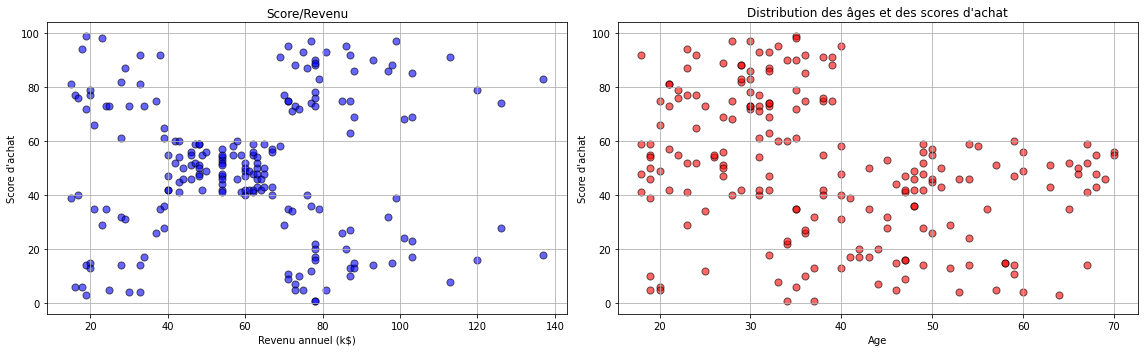

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Score/Revenu")
plt.xlabel ("Revenu annuel (k$)")
plt.ylabel ("Score d'achat")
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=50)
plt.subplot(122)
plt.title("Distribution des âges et des scores d'achat")
plt.xlabel ("Age")
plt.ylabel ("Score d'achat")
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=50)
plt.tight_layout()

L'objectif est de trouver des catégories de population ayant les mêmes comportements d'achat. Le nombre de classes étant inconnu, la classification héararchique va permettre de donner des indications sur le nombre de groupes.

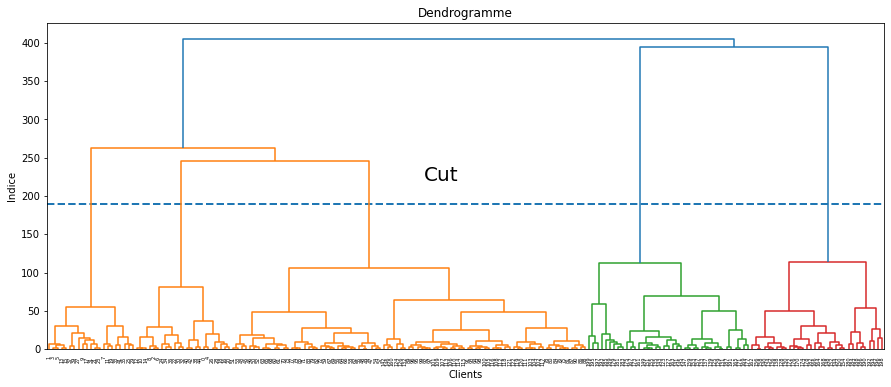

In [3]:
import scipy.cluster.hierarchy as sch

X = df.iloc[:,[3,4]].values
plt.figure(figsize=(15,6))
plt.title('Dendrogramme')
plt.xlabel('Clients')
plt.ylabel('Indice')
plt.hlines(y=190,xmin=0,xmax=2000,lw=2,linestyles='--')
plt.text(x=900,y=220,s='Cut',fontsize=20)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

On projette ensuite le résultat de la classification

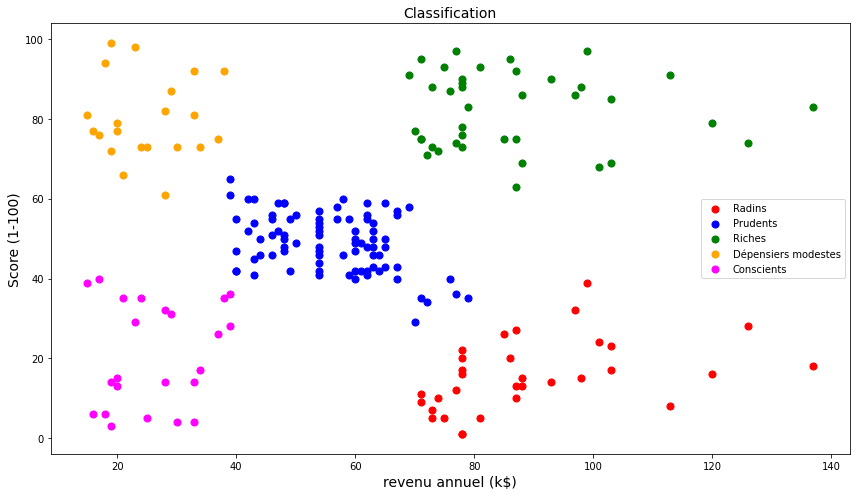

In [4]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_model = model.fit_predict(X)
plt.figure(figsize=(12,7))
plt.scatter(X[y_model == 0, 0], X[y_model == 0, 1], s = 50, c = 'red', label = 'Radins')
plt.scatter(X[y_model == 1, 0], X[y_model == 1, 1], s = 50, c = 'blue', label = 'Prudents')
plt.scatter(X[y_model == 2, 0], X[y_model == 2, 1], s = 50, c = 'green', label = 'Riches')
plt.scatter(X[y_model == 3, 0], X[y_model == 3, 1], s = 50, c = 'orange', label = 'Dépensiers modestes')
plt.scatter(X[y_model == 4, 0], X[y_model == 4, 1], s = 50, c = 'magenta', label = 'Conscients')
plt.title('Classification',fontsize=14)
plt.xlabel ("revenu annuel (k$)",fontsize=14)
plt.ylabel ("Score (1-100)",fontsize=14)
plt.legend(loc='best')
plt.tight_layout()

## Recherche de partitions

### Méthode des centres mobiles
```{index} Centres mobiles
```

```{index} K-means
```
La méthode des centres mobiles est encore connue sous le nom de méthode de réallocation-centrage ou des k-means lorsque l'ensemble à classifier est mesuré par $d$ variables. Ici, $\Omega \in \mathbb{R}^d$ est muni de sa distance euclidienne $\delta$. Pour simplifier la présentation, les pondérations des individus seront toutes égales à 1, mais la généralisation à des pondérations quelconques ne pose aucun problème.

#### Algorithme
L'algorithme des centres-mobiles peut se définir ainsi :


```{prf:algorithm} Algorithme des centres mobiles


**Entrée :** $\Omega$,$g$, métrique

**Sortie :** Une partition de $\Omega$

1. Initialisation : tirage au hasard de $g$ points de  $\Omega$ (centres initiaux des $g$ classes) 
2.  Tant que (non convergence)
    1. Étape E : Construction de la partition en affectant chaque point de $\Omega$ à la classe dont il est le plus près du centre (en cas d'égalité, l'affectation se fait à la classe de plus petit indice).
    2. Étape M : Les centres de gravité de la partition qui vient d'être calculée deviennent les nouveaux centres
```


![](./images/kmeans1.png)


L'initialisation des centres de classe étant aléatoire, il convient de répliquer l'algorithme plusieurs fois et de, par exemple, retenir la partition majoritaire. La figure suivante présente deux résultats des k-means, sur un même jeu de données (5 classes, 50 points par classes), avec une initialisation aléatoire différente.

![](./images/kmeans2.png)



#### Critère et convergence
La qualité d'un couple partition-centres est mesurée par la somme des inerties des classes par rapport à leur centre. On peut montrer qu'à chacune des deux étapes de l'algorithme, on améliore ce critère.

#### Lien avec la méthode de Ward
La méthode des centres mobiles et la méthode de Ward optimisent toutes deux, à leur façon, le critère d'inertie intra-classe. Cette situation conduit à proposer des stratégies utilisant les deux approches comme, par exemple :
- appliquer les centres-mobiles pour regrouper l'ensemble initial en un nombre "important" de classes
- appliquer la méthode de Ward en partant de ces classes 
- rechercher quelques "bons" niveaux de la hiérarchie 
- éventuellement, appliquer de nouveau la méthode des centres-mobiles sur les partitions obtenues pour améliorer encore leur critère. 

### Généralisation : les nuées dynamiques

```{index} Nuées dynamiques
```

L'idée de base consiste à remplacer les centres   qui étaient des éléments de $\mathbb{R}^d$ jouant le rôle de représentant ou encore de noyau de la classe par des éléments de nature très diverse adaptés au problème que l'on cherche à résoudre.

#### Formalisation
On note $L=\{\lambda_i\}$ l'ensemble des noyaux, $D:\Omega\times L\rightarrow \mathbb{R}^+$ une mesure de ressemblance entre éléments de $\Omega$ et de $L$. L'objectif est alors de trouver la partition en $g$ classes ($g$ fixé a priori) de $\Omega$ minimisant le critère $\displaystyle\sum_{k}\displaystyle\sum_{x\in P_k}D(x,\lambda_k)$

Cette minimisation est réalisée de façon alternée, comme pour les centres mobiles.

#### Choix du nombre de classes
En général, le critère n'est pas indépendant du nombre de classes. Par exemple, le critère de l'inertie s'annule pour la partition triviale pour laquelle chaque point forme une classe. Il s'agit donc de la meilleure partition. Il est donc
nécessaire de fixer a priori le nombre de classes. Pour résoudre ce problème très difficile, plusieurs solutions sont utilisées :
- on a une idée du nombre de classes désirées
- on recherche la meilleure partition pour plusieurs nombres de classes et on étudie la décroissance du critère en fonction du nombre de classes (méthode du coude)
- on définit une fonction $f(\Omega)$ qui rend le critère indépendant du nombre de classes
- on ajoute des contraintes supplémentaires (nombre d'individus par classe, volume d'une classe...). C'est l'option retenue par la méthode Isodata 
- on effectue des tests statistiques sur les classes
 
  

### Quelques variantes

#### K-means++
Plutôt que d'initialiser les centres de manière aléatoire, l'algorithme K-means++ propose de partitionner $\Omega=\{\mathbf x_1\cdots \mathbf x_n\}$ selon l'algorithme suivant :

1. Tirer uniformément le premier centre de classe $c_1$ dans $\Omega$\
2. Pour $i\in[\![2,g]\!]$, choisir $\mathbf{c_i}$ à partir de $\mathbf x_i$ selon la probabilité $D(\mathbf{x}_i)^2$ / $\displaystyle\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ où  $D(\mathbf{x}_i)$ est la distance entre $\mathbf{x}_i$ et le centre de classe le plus proche déjà choisi. Ceci assure de tirer des centres de classe éloignés avec forte probabilité. 


#### Accélération des k-means
L'algorithme original peut être amélioré de manière significative en évitant les calculs de distances non nécessaires. En exploitant l'inégalité triangulaire, et en conservant les bornes inférieures et supérieures des distances entre les points et les centres de classe, l'algorithme correspondant est performant, y compris pour de grandes valeurs de $k$ ({prf:ref}`km`)


```{prf:algorithm} Accélération des k-means
:label: km
**Entrée :** $\Omega, g$

**Sortie :** $P$ une partition de $X$ en $g$ classes

1. Initialisation : tirage au hasard de $g$ points $C =\{\mathbf {c_1}\cdots \mathbf {c_g\}}$
2.  Pour $\mathbf x\in \Omega,\mathbf c\in C$
    1. $l(\mathbf x,\mathbf c)=0$
3.  Pour tout $\mathbf x\in \Omega$
      1. Affecter $\mathbf x$ à la classe du centre le plus proche : $\mathbf c(x) = Arg \displaystyle\min_{\mathbf c\in C} \delta(\mathbf x,\mathbf c)$
      2. A chaque calcul de $\delta(\mathbf x,\mathbf c)$,$ l(\mathbf x,\mathbf c)=\delta(\mathbf x,\mathbf c)$
      3. $u(\mathbf x,\mathbf c)=\displaystyle\min_{\mathbf c\in C} \delta(\mathbf x,\mathbf c)$
4. Tant que (non convergence)
      1. Pour tout $\mathbf c,\mathbf {c'}\in C$ calculer $\delta (\mathbf c,\mathbf {c'})$
      2. Pour tout $\mathbf c$ $s(c)= \frac{1}{2}\displaystyle\min_{\mathbf {c'}\neq \mathbf c} \delta(\mathbf c,\mathbf {c'})$
      3. Identifier les $\mathbf x$ tels que $u(\mathbf x)\leq s(\mathbf c(\mathbf x))$
      4. Pour tout $\mathbf x\in \Omega,\mathbf c\in C$ tels que $\mathbf c\neq \mathbf c(\mathbf x)$ et $u(\mathbf x)>l(\mathbf x,\mathbf c)$ et $u(\mathbf x)>\frac{1}{2}\delta(\mathbf c(\mathbf x),\mathbf c)$
          1. Si $r(\mathbf x)$
              1. Calculer $\delta(\mathbf c(\mathbf x),\mathbf x)$
              2. $r(\mathbf x)=Faux$
          2. Sinon
              1. $\delta(\mathbf c(\mathbf x),\mathbf x)=u(\mathbf x)$
          3. Si $\delta(\mathbf c(\mathbf x),\mathbf x)>l(\mathbf x,\mathbf c)$  ou $\delta(\mathbf c(\mathbf x),\mathbf x)>\frac{1}{2}\delta(\mathbf c(\mathbf x),\mathbf c)$
              1. Calculer $\delta(\mathbf x,\mathbf c)$
              2. Si $\delta(\mathbf x,\mathbf c)<\delta(\mathbf c(\mathbf x),\mathbf x)$
                  1. $\mathbf c(\mathbf x)= \mathbf c$
      7. Pour tout $\mathbf c\in C$ 
          1. $\mathbf m(\mathbf c)$ : centre de masse des points de $\Omega$ plus proches de $\mathbf c$
      8. Pour tout $\mathbf x\in \Omega,\mathbf c\in C$
          1. $l(\mathbf x,\mathbf c)=max\left (l(\mathbf x,\mathbf c)-\delta(\mathbf m(\mathbf c),\mathbf c),0 \right )$
      9. Pour tout $\mathbf x\in \Omega$
          1. $u(\mathbf x)=u(\mathbf x)+\delta(\mathbf m(\mathbf c(\mathbf x)),\mathbf c(\mathbf x))$
          2. $r(\mathbf x)=Vrai$
      10. Pour tout $\mathbf c\in C$
          1. $\mathbf c = \mathbf m(\mathbf c)$
```



#### k-means à mini batchs
Il est également possible d'appliquer une optimisation par mini-batchs dans l'algorithme des k-means ({prf:ref}`kmbatch`).


```{prf:algorithm} Accélération des k-means
:label: kmbatch
**Entrée :** $\Omega, g$, $b$ taille des batchs

**Sortie :** $P$ une partition de $X$ en $g$ classes


1. Initialisation : tirage au hasard de $g$ points $C =\{\mathbf {c_1}\cdots \mathbf {c_g\}}$
2. $\mathbf v=0\in\mathbb{R}^g$
2.  Tant que non convergence
    1. $\mathcal{B}\leftarrow$ batch de $b$ exemples tirés de $X$
    2. Pour tout $\mathbf x\in \mathcal{B}$
        1. Affecter $\mathbf x$ à la classe du centre le plus proche $\mathbf T(\mathbf x)$
    3. Pour tout $\mathbf x\in \mathcal{B}$
        1. $\mathbf c = \mathbf T(\mathbf x)$
        2. $v_c = v_c + 1$
        3. $\eta = \frac{1}{v_c}$
        4. $\mathbf c = (1-\eta)\mathbf c + \eta \mathbf x$
  ```





### Exemple
  
On génère des données

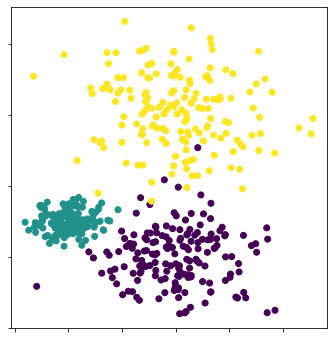

In [5]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

nb_classes = 3
center = np.array(
        [[ 3,  0],[1 ,  1],[3,  4]])
cluster_std = np.array([0.8, 0.3, 1])    

X, y = make_blobs(n_samples=500,centers=center,cluster_std = cluster_std, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.tight_layout()
plt.tick_params(labelbottom=False)
plt.tick_params(labelleft=False)

Puis on applique l'algorithme des $k$-means.

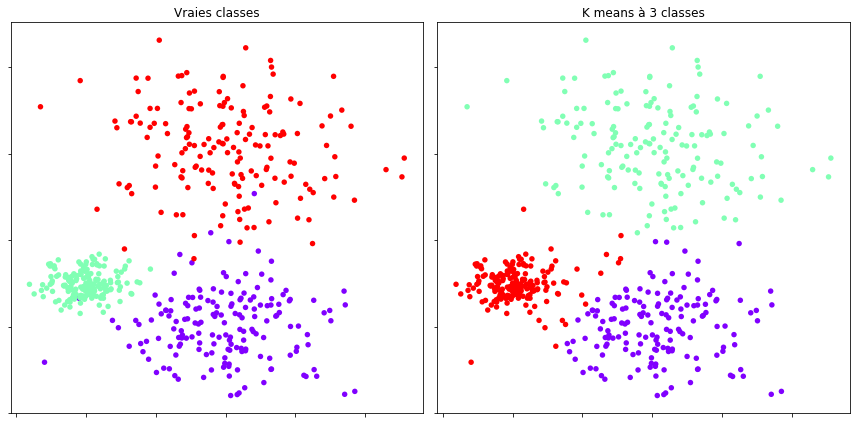

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=nb_classes,n_init=10)
    
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1],c=y, s=30,linewidths=0,cmap=plt.cm.rainbow)
plt.title("Vraies classes")
plt.tick_params(labelbottom=False)
plt.tick_params(labelleft=False)
plt.subplot(122)
model.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=30,linewidths=0, cmap=plt.cm.rainbow)
plt.title("K means à {0:d} classes".format(nb_classes))
plt.tick_params(labelbottom=False)
plt.tick_params(labelleft=False)
plt.tight_layout() 

## Modèles de mélange
Les modèles de mélange supposent que les données proviennent d'un mélange de distributions (généralement gaussiennes), et l'objectif est alors d'estimer les paramètres du modèle de mélange en maximisant la fonction de vraisemblance pour les données.
L'optimisation directe de la fonction de vraisemblance dans ce cas n'est pas une tâche simple, en raison des contraintes nécessaires sur les paramètres et de la nature complexe de la fonction de vraisemblance, qui présente généralement un grand nombre de maxima locaux et de points de selle. Une méthode courante pour estimer les paramètres du modèle de mélange est l'algorithme EM.

### Définition


Soient $\mathcal S = \{\mathbf X_1\cdots X_n\}$ $n$ vecteurs aléatoires i.i.d. à valeur dans $\mathcal X\subset \mathbb{R}^d$ , chaque $\mathbf X_i$ étant distribué selon 

$$g(\mathbf x|\boldsymbol \theta) = \displaystyle\sum_{i=1}^K w_i\Phi_i(\mathbf x)$$

où $\Phi_i,i\in[\![1,K]\!]$ sont des densités de probabilité sur $\mathcal X$ et les $w_i$ sont des poids positifs, sommant à 1. $g$ peut être interprétée comme suit : soit $Z$ une variable aléatoire discrète prenant les valeurs $i\in[\![1,K]\!]$ avec probabilité $w_i$, et soit $\mathbf X$ un vecteur aléatoire dont la distribution conditionnelle, étant donnée $Z=z$ est $\Phi_z$. Alors 

$$\Phi_{Z,\mathbf X}(z,\mathbf x) = \Phi_Z(z)\Phi_{\mathbf X|Z}(\mathbf x,z) = w_z(\mathbf x)$$

et la distribution marginale de $\mathbf X$ est calculée en sommant sur $z$ les probabilités jointes.

Un vecteur aléatoire $\mathbf X$ suivant $g$ peut donc être simulé d'abord en tirant $Z$ suivant $P(Z=z)=w_z,z\in[\![1,K]\!]$, puis en tirant $\mathbf X$ suivant $\Phi_Z$. La famille $\mathcal S$ ne contenant que les $\mathbf X_i$, les $Z_i$ sont des variables latentes, interprétées comme les étiquettes cachées des classes auxquelles les $\mathbf X_i$ appartiennent.

Typiquement, les $\Phi_k$ sont des lois paramétriques. Classiquement ce sont des lois gaussiennes $\mathcal N(\boldsymbol \mu_k,\boldsymbol \Sigma_k)$ et donc en rassemblant tous les paramètres des lois, incluant les $w_k$, dans un vecteur de paramètre $\boldsymbol \theta = (\mu_k,\boldsymbol \Sigma_k,w_k,k\in[\!1,K]\!])$, on peut écrire

$$g(s|\boldsymbol \theta) = \prod_{i=1}^n g(\mathbf x_i|\boldsymbol \theta) = \prod_{i=1}^n \displaystyle\sum_{k=1}^K w_k \Phi_k(\mathbf x_i|\boldsymbol\mu_k \boldsymbol\Sigma_k)$$

où $s=(\mathbf x_1\cdots \mathbf x_n)$ dénote une réalisation de $\mathcal S$.


On estime alors $\boldsymbol\theta$ en maximisant la log vraisemblance

$$\ell(\boldsymbol\theta|s) = \displaystyle\sum_{i=1}^n ln(g(\mathbf x_i|\boldsymbol \theta)) = \displaystyle\sum_{i=1}^n ln \left ( \displaystyle\sum_{k=1}^K w_k \Phi_k(\mathbf x_i|\boldsymbol\mu_k \boldsymbol\Sigma_k) \right )$$

ce qui est en général complexe, la fonction $\ell$ admettant de nombreux extrema locaux.

### Algorithme EM
 Plutôt que d'optimiser $\ell$ directement depuis les données $s$, l'algorithme EM ({prf:ref}`EM`) augmente d'abord les données des variables latentes (les étiquettes $\mathbf z=(z_1\cdots z_n)$ des classes). L'idée est que $s$ est uniquement la partie observée des données aléatoires $(\mathcal S,\mathbf Z)$ générées d'abord en tirant $Z$ suivant $P(Z=z)$, puis en tirant $\mathbf X$ suivant $\Phi_z$, de sorte à avoir 

 $$g(s,z|\boldsymbol \theta) = \displaystyle\prod_{i=1}^n w_{z_i} \Phi_{z_i}(\mathbf x_i)$$

 Ainsi, la log vraisemblance des données complètes, en général plus facile à optimiser, est 

 $$\bar\ell(\boldsymbol\theta|s,z) =\displaystyle\sum{i=1}^n ln(w_{z_i} \Phi_{z_i}(\mathbf x_i))$$

Cependant, les $z$ ne sont pas observées et $\bar\ell$ ne peut être évaluée. Dans l'étape E de l'algorithme EM, $\bar\ell$ est remplacée par $\mathbb{E}_p \bar\ell(\boldsymbol \theta |s,\mathbf Z)$, où l'indice $p$ indique que $\mathbf Z$ est distribuée selon la distribution conditionnelle de $\mathbf Z$ étant donnée $\mathcal S=s$, soit 

$$p(z)=g(z|s,\boldsymbol \theta) \propto g(s,z|\boldsymbol \theta)$$


```{prf:remark}
:class: dropdown
$p(z)$ est de la forme $p_1(z_1)\cdots p_n(z_n)$ de telle sorte que, étant donné $\mathcal S=s$, les composantes de $\mathbf Z$ sont deux à deux indépendantes.

```

```{prf:algorithm} Algorithmes EM
:label: EM
**Entrée :** $s,\boldsymbol\theta^{(0)}$

**Sortie :** Approximation de la log vraisemblance maximale

1. $i=1$
2.  Tant que (not stop)
    1. Etape E : Trouver $p^{(i)}(z) = g(s|s,\boldsymbol\theta^{(i-1)})$ et $Q^{(i)}(\boldsymbol\theta)=\mathbb{E}_p \bar\ell(\boldsymbol \theta |s,\mathbf Z)$
    2. Etape M : $\boldsymbol\theta^{(i)} = Arg \displaystyle\max_{\boldsymbol\theta} Q^{(i)}(\boldsymbol\theta)$
    3. $i = i+1$
3. Retourner $\boldsymbol\theta{(i)}$
```

Dans l'{prf:ref}`EM`, un critère d'arrêt est par exemple

$$\frac{\ell(\boldsymbol\theta{(i)}|s)-\ell(\boldsymbol\theta^{(i-1)}|s)}{\ell(\boldsymbol\theta{(i)}|s)}<\epsilon$$

Sous certaines conditions, la suite des $\ell(\boldsymbol\theta{(i)}|s)$ converge vers un maximum local de la log vraisemblance $\ell$. La convergence vers le maximum global dépend bien sûr du choix de $\boldsymbol\theta^{(0)}$, de sorte qu'une stratégie possible est d'exécuter plusieurs fois l'algorithme avec des initialisations différentes.

Dans le cas d'un mélange gaussien, $\Phi_k=\mathcal N(\boldsymbol\mu_k,\boldsymbol\Sigma_k),k\in[\![1,K]\!]$. Si $\boldsymbol\theta^{(i-1)}$ est le vecteur optimal à l'itération courante, constitué des poids $w_k^{(i-1)}$, des vecteurs moyenne $(\boldsymbol\mu_k)^{(i-1)}$ et des matrices de covariances $(\boldsymbol\Sigma_k)^{(i-1)}$, alors on détermine $p^{(i)}$, la distribution de $\mathbf Z$ conditionnelement à $\mathcal S=s$, pour le paramètre $\boldsymbol\theta^{(i-1)}$. Puisque les composantes de $\mathbf Z$ étant donné $\mathcal S=s$ sont indépendantes, il suffit de spécifier la distribution discrète $p_j^{(i)}$ de chaque $Z_j$, étant données l'observation $\mathbf X_j=\mathbf x_j$, calculée à l'aide de la forule de Bayes

$$p_j^{(i)}(k)\propto w_k^{(i-1)}\Phi_k(\mathbf x_j|\boldsymbol\mu_k^{(i-1)},\boldsymbol\Sigma_k^{(i-1)}),k\in[\![1,K]\!]$$

Alors
1. Pour l'étape E

$$Q^{(i)}(\boldsymbol\theta) = \mathbb{E}_p \displaystyle\sum_{j=1}^n \left (ln w_{z_j} + ln \Phi_{z_j}(\mathbf x_j|\boldsymbol\mu_{Z_j},\boldsymbol\Sigma_{Z_j}) \right )$$

où les $Z_j$ sont indépendants et distribués selon $p_j^{(i)}$. 

2. Pour l'étape M, on maximise 

$$ \displaystyle\sum_{j=1}^n\displaystyle\sum_{k=1}^K p_j^{(i)}(k)\left (ln w_k + ln \Phi_k(\mathbf x_j|\boldsymbol\mu_{k},\boldsymbol\Sigma_{k})\right )$$

sous la contrainte $\displaystyle\sum_{k=1}^K w_k=1$. En utilisant une relxation lagrangienne, et le fait que $\displaystyle\sum_{k=1}^K p_j^{(i)}(k)=1$ on trouve pour tout $k\in[\![1,K]\!]$

$$w_k = \frac1n\displaystyle\sum_{j=1}^n p_j^{(i)}(k)$$

$$\boldsymbol\mu_k = \frac{\displaystyle\sum_{j=1}^n p_j^{(i)}(k) \mathbf x_j}{\displaystyle\sum_{j=1}^n p_j^{(i)}(k)}$$

$$\boldsymbol\Sigma_{k} = \frac{\displaystyle\sum_{j=1}^n p_j^{(i)}(k) (\mathbf x_j-\boldsymbol\mu_k)(\mathbf x_j-\boldsymbol\mu_k)^T}{\displaystyle\sum_{j=1}^n p_j^{(i)}(k)}$$

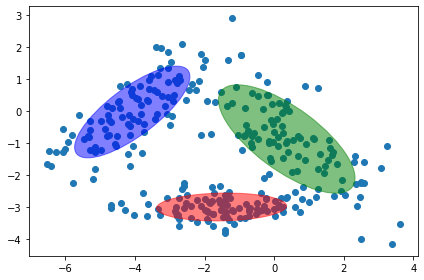

In [7]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import matplotlib

X = np.genfromtxt('./data/mixture.csv', delimiter=',')
K = 3
n, d = X.shape

# Paramètres initiaux
W = np.array([[1/3,1/3,1/3]]) # poids
M  = np.array([[-2.0,-4,0],[-3,1,-1]]) # Moyennes
C = np.zeros((3,2,2)) # Co

C[:,0,0] = 1
C[:,1,1] = 1

p = np.zeros((3,300))

for i in range(0,100): 

    # Etape E
    for k in range(0,K):  
        mvn = multivariate_normal( M[:,k].T, C[k,:,:] )
        p[k,:] = W[0,k]*mvn.pdf(X)

    # Etape M
    p = p/sum(p,0)   
    W = np.mean(p,1).reshape(1,3)
    for k in range(0,K):
        M[:,k] = (X.T @ p[k,:].T)/sum(p[k,:])
        xm = X.T - M[:,k].reshape(2,1)
        C[k,:,:] = xm @ (xm*p[k,:]).T/sum(p[k,:])


fig = plt.subplot(1, 1, 1)
plt.scatter(X[:,0],X[:,1])
c = ['r','b','g']
for i in range(0,3):
    v, w = np.linalg.eigh(C[i,:,:])
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])

    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi  
    ell = matplotlib.patches.Ellipse(M[:,i], v[0], v[1], angle=180.0 + angle, color=c[i])
    ell.set_clip_box(fig.bbox)
    ell.set_alpha(0.5)
    fig.add_artist(ell)

plt.tight_layout()
plt.show()